## news_mood.py 
----
The below code is meant to provide a cursory look at the world mood according to the Twitter profiles of news agencies. In essence, the script allows one to quickly perform a sentiment analysis on the most recent tweets of any given Twitter accounts and plot the results. Notable libraries used to complete this application include: Matplotlib, Pandas, Tweepy, VADER Sentiment Analysis, and Seaborn.

In [63]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")


In [2]:



# Initialize Sentiment Analyzer 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Twitter Api keys 
consumer_key = "q0lLgCzfoHzGBBxV1NpmzNnI7"
consumer_secret = "3DDnb6tRhPeB9xjzzTwYI9XzHe2hgPbI4P9ypR6NCjIBqY94Wz"

access_token = "1019763266854125568-BJ2cmUx6WgEgWpcDejVLWwlTc8k0KH"
access_token_secret = "Gk1bTWKfkBQhcToU3szR3r6EsyYXjxhjCwfFjQGa13sgt"



In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Select News Sources (Twitter Accounts)
news_source = ["CNN", "FOX", "BBCWorld", "CBSNews", "nytimes"]

## Grab Tweets

In [12]:
# Create a generic dictionary for holding all tweet information
tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [] }
vader_anal = {"tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

# Grab 200 tweets from each site (total 1000)
for x in range(0,len(news_source)):

    # Loop through all news sources... which are CNN,FOX, etc to get mthe 200 tweets 
    for source in news_source:

        # Grab the tweets
        tweets = api.user_timeline(source, page=x)
        #print(tweets)

         # For each tweet store it into the dictionary
        for tweet in tweets:
            
            # All data is grabbed from the JSON returned by Twitter
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])

            vader_anal["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            vader_anal["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            vader_anal["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            vader_anal["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

In [138]:
# Store the final contents into a DataFrame after joining two dataframes at column axis , vader anal df and tweet_data df.
vader_anal_df = pd.DataFrame(vader_anal)
tweet_data_df = pd.DataFrame(tweet_data)
my_tweet_df = pd.concat([vader_anal_df,tweet_data_df], axis=1, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)


# # Export to CSV
file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
my_tweet_df.to_csv("./" + file_name, encoding="utf-8")

# # Visualize the DataFrame
my_tweet_df.head()

,tweet_vader_score,tweet_neg_score,tweet_pos_score,tweet_neu_score,tweet_source,tweet_text,tweet_date
0,0.000,0.0,0.000,1.000,CNN,"¡Ay, caramba! A real-life Kwik-E-Mart store ha...",Wed Aug 22 00:44:09 +0000 2018
1,0.000,0.0,0.000,1.000,CNN,This family has been traveling the globe by sa...,Wed Aug 22 00:41:00 +0000 2018
2,0.128,0.0,0.057,0.943,CNN,"RT @OutFrontCNN: ""I think when the President a...",Wed Aug 22 00:37:32 +0000 2018
3,0.000,0.0,0.000,1.000,CNN,Cowabunga! A real-life Kwik-E-Mart store has o...,Wed Aug 22 00:26:43 +0000 2018
4,0.000,0.0,0.000,1.000,CNN,Ep3 of “RBG: Beyond Notorious” takes us back t...,Wed Aug 22 00:25:21 +0000 2018


In [58]:
# Count the total number of tweets
my_tweet_df.count()

tweet_vader_score    500
tweet_neg_score      500
tweet_pos_score      500
tweet_neu_score      500
tweet_source         500
tweet_text           500
tweet_date           500
dtype: int64

In [59]:
# Obtain the source names for reference
my_tweet_df["tweet_source"].unique()

array(['CNN', 'fantastic ms.', 'BBC News (World)', 'CBS News',
       'The New York Times'], dtype=object)

In [60]:
# Convert dates (currently strings) into datetimes
my_tweet_df["tweet_date"] = pd.to_datetime(my_tweet_df["tweet_date"])

# Sort the dataframe by date
my_tweet_df.sort_values("tweet_date", inplace=True)
my_tweet_df.reset_index(drop=True, inplace=True)

# Preview the data to confirm data is sorted

my_tweet_df.head()

,tweet_vader_score,tweet_neg_score,tweet_pos_score,tweet_neu_score,tweet_source,tweet_text,tweet_date
0,0.6476,0.00,0.209,0.791,fantastic ms.,Excited to be going to @xoxo this year with @b...,2018-07-06 23:22:17
1,0.0000,0.00,0.000,1.000,fantastic ms.,@jilljubs Omg me too but I’m also afraid,2018-07-07 15:23:42
2,0.5499,0.32,0.346,0.334,fantastic ms.,"Horribly jet lagged and battling anxiety, but ...",2018-07-08 17:34:51
3,0.0772,0.00,0.067,0.933,fantastic ms.,@amyngyn tbh I specifically look for “healthy”...,2018-07-08 17:37:47
4,0.5550,0.00,0.193,0.807,fantastic ms.,@mattopsahl Oh! I did go to the Boston Common ...,2018-07-08 17:39:19


# Overall Sentimental Analysis using Seaborn and Numpy 

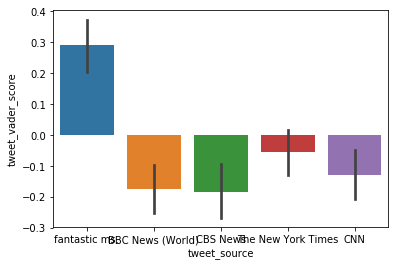

In [64]:
sns.barplot(x="tweet_source",y="tweet_vader_score",data= my_tweet_df,estimator=np.mean)

In [65]:
# In Pandas DF
# Average all polarities by news source
tweet_df_polarity = my_tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

# View the polarities
pd.DataFrame(tweet_df_polarity)

,tweet_vader_score
tweet_source,
BBC News (World),-0.175797
CBS News,-0.184360
CNN,-0.131053
The New York Times,-0.056498
fantastic ms.,0.289490


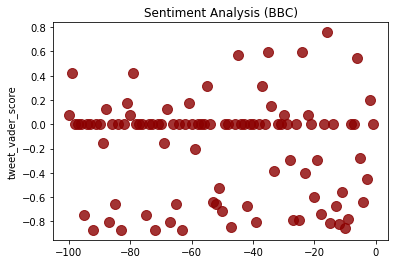

In [150]:
# Scatter plots using seaborn


sns.regplot(x = np.arange(-len(my_tweet_df[my_tweet_df["tweet_source"] == "BBC News (World)"]), 0, 1),y=my_tweet_df[my_tweet_df["tweet_source"] == "BBC News (World)"]["tweet_vader_score"],fit_reg=False,marker = "o",scatter_kws={"color":"darkred","alpha":0.8,"s":100})
ax = plt.gca()
ax.set_title("Sentiment Analysis (BBC)",fontsize = 12)
plt.savefig('Sentiment_BBC.png')

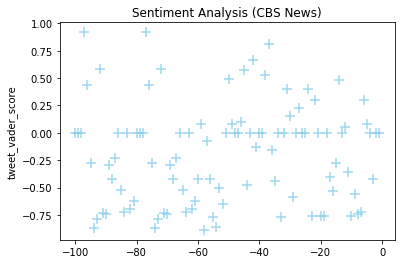

In [139]:
sns.regplot(x = np.arange(-len(my_tweet_df[my_tweet_df["tweet_source"] == "CBS News"]), 0, 1),y=my_tweet_df[my_tweet_df["tweet_source"] == "CBS News"]["tweet_vader_score"],fit_reg=False,marker = "+",scatter_kws={"color":"skyblue","alpha":0.8,"s":100})
ax = plt.gca()
ax.set_title("Sentiment Analysis (CBS News)",fontsize = 12)
plt.savefig('Sentiment_CBS.png')

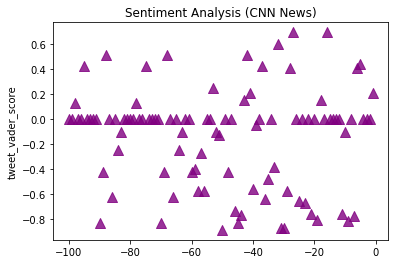

In [140]:
sns.regplot(x = np.arange(-len(my_tweet_df[my_tweet_df["tweet_source"] == "CNN"]), 0, 1),y=my_tweet_df[my_tweet_df["tweet_source"] == "CNN"]["tweet_vader_score"],fit_reg=False,marker = "^",scatter_kws={"color":"purple","alpha":0.8,"s":100})
ax = plt.gca()
ax.set_title("Sentiment Analysis (CNN News)",fontsize = 12)
plt.savefig('Sentiment_CNN.png')

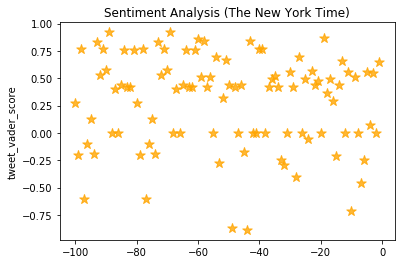

In [146]:
sns.regplot(x = np.arange(-len(my_tweet_df[my_tweet_df["tweet_source"] == "The New York Times"]), 0, 1),y=my_tweet_df[my_tweet_df["tweet_source"] == "fantastic ms."]["tweet_vader_score"],fit_reg=False,marker = "*",scatter_kws={"color":"orange","alpha":0.8,"s":100})
ax = plt.gca()
ax.set_title("Sentiment Analysis (The New York Time)",fontsize = 12)
plt.savefig('Sentiment_The_Ny_Times.png')

Text(0.5,1,'Sentiment Analysis (fantastic ms.)')

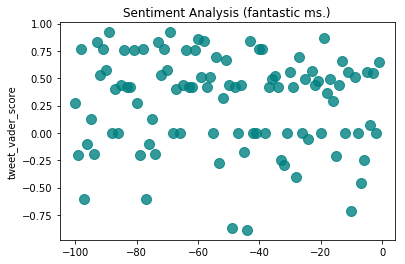

In [147]:
sns.regplot(x = np.arange(-len(my_tweet_df[my_tweet_df["tweet_source"] == "fantastic ms."]), 0, 1),y=my_tweet_df[my_tweet_df["tweet_source"] == "fantastic ms."]["tweet_vader_score"],fit_reg=False,marker = "o",scatter_kws={"color":"teal","alpha":0.8,"s":100})
ax = plt.gca()
ax.set_title("Sentiment Analysis (fantastic ms.)",fontsize = 12)

In [148]:
plt.savefig('Sentiment_fantastic ms.png')

<Figure size 432x288 with 0 Axes>